In [1]:
# libraries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
# data
from data.data import data
from data.sys_data import sys_data 

# setup
#sns.set_theme(style="whitegrid")
#sns.set(color_codes=True)

In [2]:
# get data
raw_dataset = data.parse_data('../test_data.txt')
df = pd.DataFrame(raw_dataset)

print("Peak Bandwidth: ", sys_data.peak_theoretical_bandwidth, "GB/s")
print(raw_dataset)

Peak Bandwidth:  42.94967296 GB/s
              name    space           min           max        median  \
0         Sum slow    10000  1.711400e-05  1.142430e-04  1.838100e-05   
1       Sum arrays      400  1.890000e-07  1.809000e-06  2.180000e-07   
2       Sum arrays     4000  1.955000e-06  4.791000e-06  1.987000e-06   
3       Sum arrays    40000  1.952200e-05  2.637800e-05  1.977500e-05   
4  Matrix multiply  4000000  3.031280e-03  5.680770e-03  3.034720e-03   
5   Insertion sort       40  1.290000e-07  3.250000e-07  1.480000e-07   
6   Insertion sort      400  1.141800e-05  3.197200e-05  1.177400e-05   
7   Insertion sort     4000  1.107640e-03  1.587240e-03  1.112730e-03   

           mean            sd            q1            q3  
0  1.892100e-05  4.118110e-06  1.715100e-05  2.078500e-05  
1  2.200480e-07  3.794670e-08  2.160000e-07  2.190000e-07  
2  2.007050e-06  2.346720e-07  1.982000e-06  1.993000e-06  
3  1.993520e-05  3.431280e-06  1.975200e-05  1.983400e-05  
4  3.063

In [3]:
df_sort = df.loc[df.name == 'Insertion sort'].copy()
print(df_sort)

             name  space           min           max        median  \
5  Insertion sort     40  1.290000e-07  3.250000e-07  1.480000e-07   
6  Insertion sort    400  1.141800e-05  3.197200e-05  1.177400e-05   
7  Insertion sort   4000  1.107640e-03  1.587240e-03  1.112730e-03   

           mean            sd            q1            q3  
5  1.479370e-07  8.192120e-09  1.440000e-07  1.510000e-07  
6  1.186460e-05  7.463010e-07  1.171300e-05  1.188000e-05  
7  1.133610e-03  5.157890e-05  1.110990e-03  1.115880e-03  


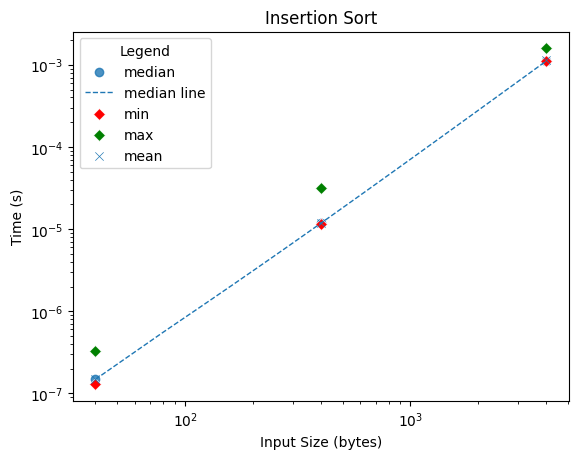

In [12]:
sns.regplot(
    data=df_sort,
    x="space", y="median",
    ci=None, order=2, line_kws={"ls":"--", "linewidth":1},
)
sns.scatterplot(
    data=df_sort, marker='D',
    x="space", y="min", legend=False, c='red',
)
sns.scatterplot(
    data=df_sort, marker='D',
    x="space", y="max", legend=False, c='green',
)
sns.scatterplot(
    data=df_sort, marker='x',
    x="space", y="mean", legend=False,
)
plt.title('Insertion Sort')
plt.xlabel('Input Size (bytes)')
plt.ylabel('Time (s)')
plt.legend(title='Legend', loc='upper left', labels=['median', 'median line', 'min', 'max', 'mean'])
plt.xscale('log')
plt.yscale('log')
plt.show()

             name  space           min           max        median  \
5  Insertion sort     40  1.290000e-07  3.250000e-07  1.480000e-07   

           mean            sd            q1            q3  
5  1.479370e-07  8.192120e-09  1.440000e-07  1.510000e-07  


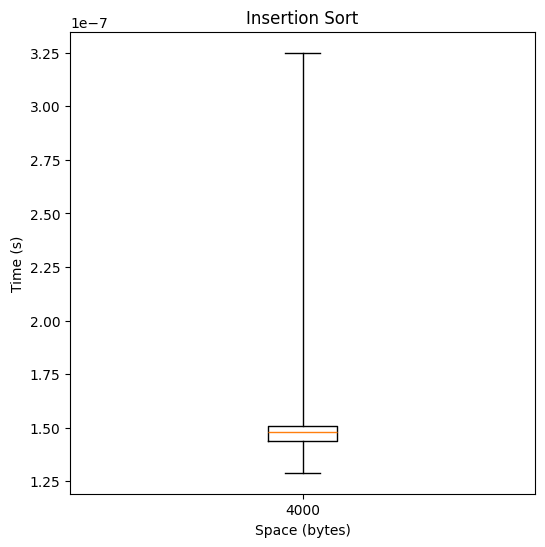

In [16]:
# Define the summary statistics
df_box = df_sort[df_sort['space'] == 40]
print(df_box)
# fix max values
#whisker_length = 1.5 * (df_box.q3.iloc[0] - df_box.q1.iloc[0])
#adjusted_max = min(df_box['max'].iloc[0], df_box.q3.iloc[0] + whisker_length)  # Cap the max whisker
adjusted_max = df_box['max']

# Manually create the boxplot data structure
box_data = {
    'whiskers': [df_box['min'], adjusted_max],
    'median': [df_box['median']],
    'boxes': [df_box.q1, df_box.q3],
}
fig, ax = plt.subplots(figsize=(6, 6))

ax.bxp([{
    'med': df_box['median'],
    'q1': df_box.q1,
    'q3': df_box.q3,
    'whislo': df_box['min'],
    'whishi': adjusted_max,
    'label': 4000,
}], showfliers=False)

ax.set_title("Insertion Sort")
ax.set_ylabel("Time (s)")
ax.set_xlabel("Space (bytes)")
plt.show()
